In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image
import os
import sys

import tensorflow as tf
import keras as keras
from tensorflow.keras.preprocessing import image
from keras.models import load_model
from keras_efficientnets import EfficientNetB0
from keras.applications import VGG16

import rembg

In [12]:
#choix du modele utilisé
# choice = int(input('1 : VGG16 - 2 : EfficientNetB0'))
choice = 2

In [13]:
# Charger le modèle pré-entraîné
if choice == 1 :
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

elif choice == 2 :
    base_model = EfficientNetB0(weights='imagenet', include_top=True)
    
else : 
    print("choisir entre 1 et 2")
    sys.exit("Erreur : entrée invalide.")

In [14]:
# Charger le modèle à partir du fichier HDF5
# choix du model
if choice == 1 :
    model = load_model("../model_saved/0_VGG16_model.h5py")

elif choice == 2 :
    model = load_model("../model_saved/0_efficientNet_model.h5py")

else : 
    print("choisir entre 1 et 2")
    sys.exit("Erreur : entrée invalide.")

In [15]:
# Charger l'image à prédire
img_path = r"..\img_test\img_test.png"

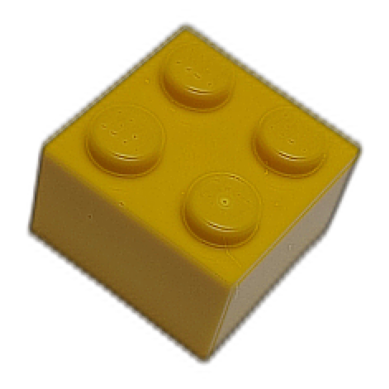

In [16]:
# affichage de l'image
img = Image.open(img_path)
img_aff = mpimg.imread(img_path)

plt.axis('off')
plt.imshow(img_aff)

plt.show()

In [17]:
# preprocessing de l'image à prédir
# img = img.resize((224, 224))

# Prétraiter l'image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array[:,:,:3], axis=0)
img_array /= 255.0  # Normaliser les valeurs des pixels

In [18]:
# Faire une prédiction
predictions = model.predict(img_array)

1/1 [==============================] - 11s 11s/step


In [19]:
def fetch_modelClass()->dict:
    """
    Récupère et retourne un dictionnaire associant des indices à des chemins de fichiers image à partir d'une structure de répertoires spécifiée.

    La fonction parcourt un répertoire nommé "../img" et ses sous-répertoires pour trouver des fichiers PNG.
    Elle crée un dictionnaire où chaque clé est un indice et la valeur est le chemin vers un fichier PNG.

    Retourne:
        dict: Un dictionnaire où les clés sont des indices et les valeurs sont des chemins vers des fichiers PNG.
    """

    i= 0
    dict = {}

    # Parcourir chaque dossier dans le répertoire "../img"
    for folder_imgName in os.listdir("../img_prepa"):

        # Parcourir chaque fichier dans le dossier actuel
        for files_name in os.listdir("../img_prepa" + '/' + folder_imgName):

            # Vérifier si le fichier a une extension .png
            if files_name.endswith(".png"):
                folder_path = "../img_prepa" + '/' + folder_imgName

                # img loading
                img = str(folder_path) + '/' + str(files_name)

        dict[i] = img
        i += 1

    return dict

In [20]:
# Trouver l'indice de la classe la plus probable
id_max = np.argmax(predictions)
print(f'Classe la plus probable : {id_max} pour {predictions[0][id_max]:.2f} de probabilité')

Classe la plus probable : 1 pour 1.00 de probabilité


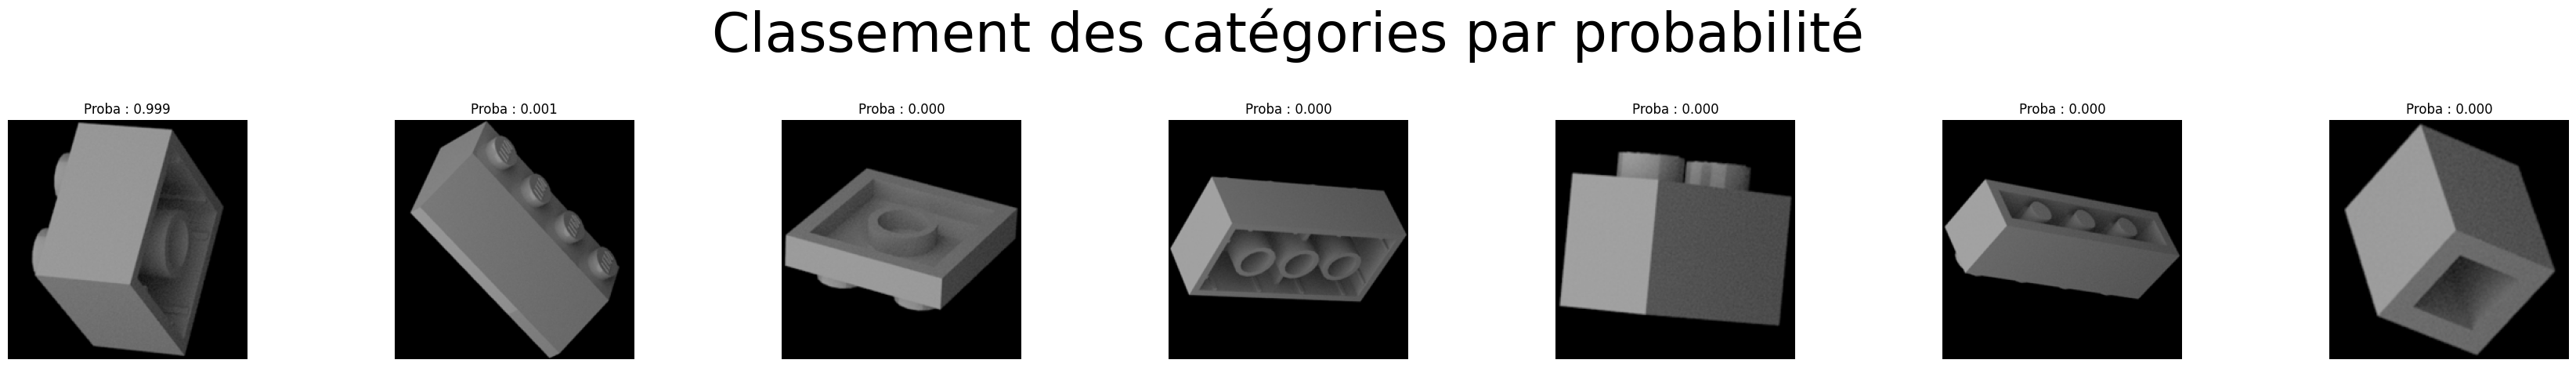

In [21]:
# faire un dictionnaire des resultat avec les classes
dict_resultat = {}
i = 0
preds = predictions.tolist()[0]
    
for pred in preds:
    dict_resultat[pred] = i
    i += 1

# mise de la liste dans l'ordre des probabilité du plus fort au plus faible
preds = sorted(preds, reverse=True)

# génération d'un dictionnaire dans lordre de probabilité avec comme clé la valeur de la classe de Lego
new_dict = {}

for elem in preds:
    new_dict[dict_resultat[elem]] = elem

# Récupérer le dictionnaire des chemins des images
dict = fetch_modelClass()

# Créer un nouveau dictionnaire pour associer les probabilités triées aux chemins des images
dict2 = {}
for k, v in new_dict.items():
    dict2[v] = dict[k]

# Créer une figure avec plusieurs sous-graphes, un pour chaque image
fig, axes = plt.subplots(1, len(dict2), figsize=(5 * len(dict2), 5))  # Ajuster la taille de la figure en fonction du nombre d'images
fig.suptitle('Classement des catégories par probabilité', fontsize=50)

# Afficher chaque image avec sa probabilité correspondante
for i, (k, v) in enumerate(dict2.items()):
    img = mpimg.imread(v)  # Lire l'image à partir du chemin
    axes[i].imshow(img)
    axes[i].set_title(f'Proba : {k:.3f}')  # Ajouter un titre avec la probabilité
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].axis('off')  # Optionnel : pour masquer les axes

# Ajuster la mise en page de la figure
fig.tight_layout(pad=3.0)
plt.show()